In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [2]:
for i in range(8):
    if i==0:
        train = pd.read_csv('salida/resultados/RTE3/presentacion/DEV_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/presentacion/DEV_'+str(i+1)+'.csv.csv')
        train=pd.concat([train,temp])

In [3]:
train=train.reset_index(drop=True)

In [4]:
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,YES
1,-0.000762,3178.86960,1.584,1.412555,8.697627,0.467034,0,5,0.478848,NO
2,-0.280848,2433.71730,2.986,1.415133,5.036993,1.305065,0,1,0.616979,UNKNOWN
3,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,YES
4,-0.140882,796.06140,1.530,0.716918,0.978448,0.231184,0,0,0.037146,YES
...,...,...,...,...,...,...,...,...,...,...
795,-0.019967,759.53076,2.055,0.703017,0.616965,0.424818,0,0,0.258356,UNKNOWN
796,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,YES
797,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,UNKNOWN
798,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,NO


In [5]:
train=train.drop(["antonimos","sim_faltantes","distancias","suma"],axis=1)
train

,entropias,mutual_info,m_earth,max_info_p,relaciones,CLASS
0,0.000,0.000000,0.000000,0.000000,0,YES
1,1.584,1.412555,8.697627,0.467034,5,NO
2,2.986,1.415133,5.036993,1.305065,1,UNKNOWN
3,0.000,0.000000,0.000000,0.000000,0,YES
4,1.530,0.716918,0.978448,0.231184,0,YES
...,...,...,...,...,...,...
795,2.055,0.703017,0.616965,0.424818,0,UNKNOWN
796,0.000,0.000000,0.000000,0.000000,0,YES
797,0.000,0.000000,0.000000,0.000000,0,UNKNOWN
798,0.000,0.000000,0.000000,0.000000,0,NO


In [6]:
X = train.drop(['CLASS'],axis=1)
y_ = train['CLASS']

In [7]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    elif i=="UNKNOWN":
        y_train.append(2)
    elif i=="NO":
        y_train.append(0)
    else:
        print("ora",i)

In [8]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

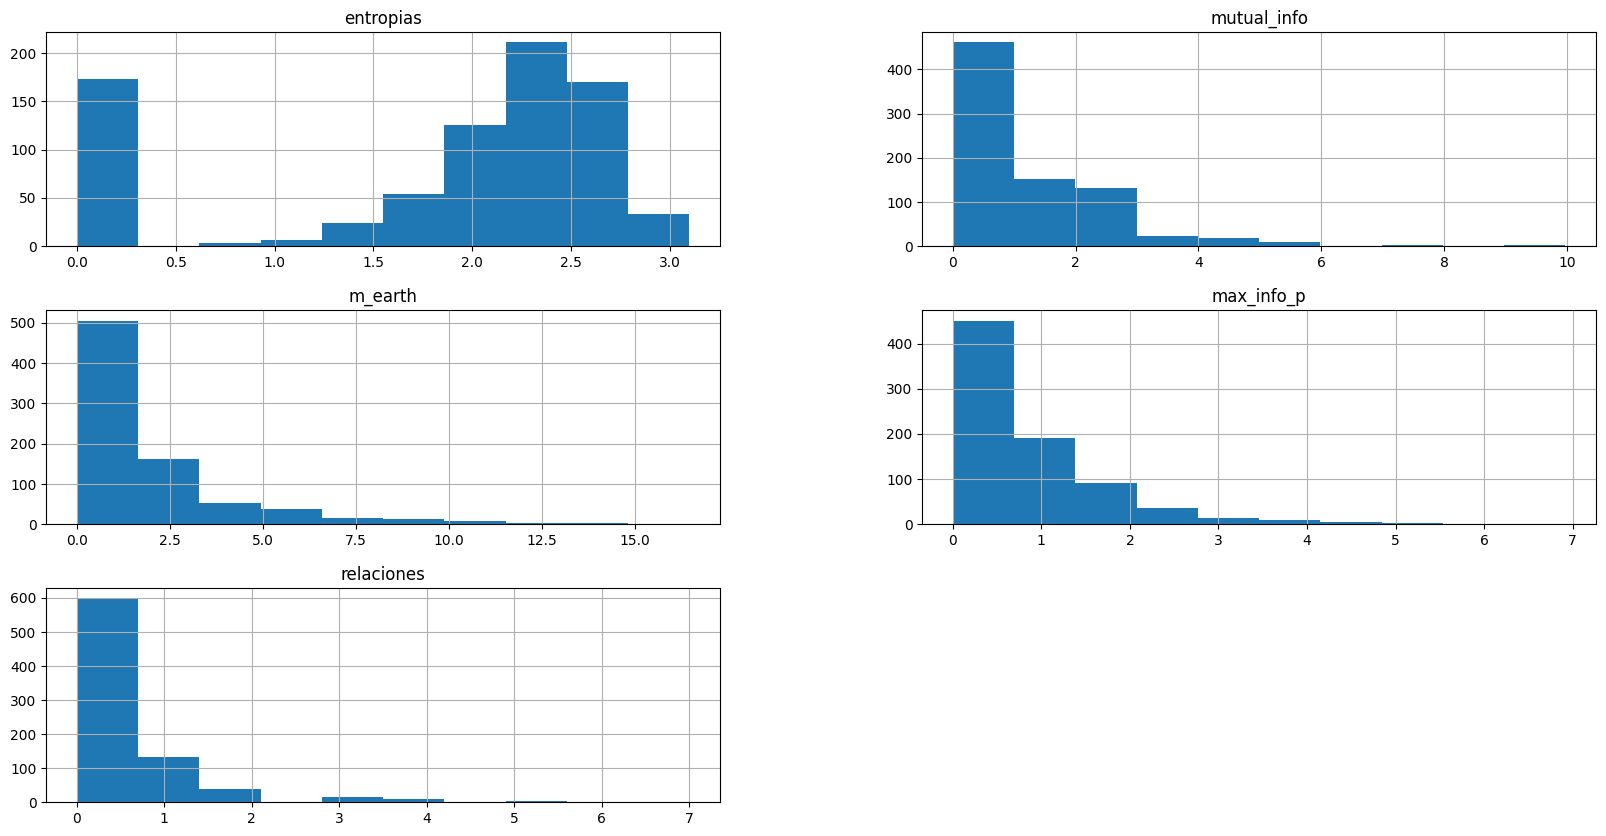

In [9]:
train.hist(figsize=(20,10))
plt.show()

In [10]:
for i in range(8):
    if i==0:
        test = pd.read_csv('salida/resultados/RTE3/presentacion/TEST_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/presentacion/TEST_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [11]:
test=test.reset_index(drop=True)

In [12]:
#test["relaciones"]=test["relaciones"]+test["antonimos"]

In [13]:
test=test.drop(["antonimos","sim_faltantes","distancias","suma"],axis=1)
test

,entropias,mutual_info,m_earth,max_info_p,relaciones,CLASS
0,2.093,1.415909e+00,7.061271,0.919573,0,YES
1,2.149,7.099558e-01,0.701502,0.393066,0,YES
2,0.000,1.609823e-13,4.289287,0.000000,0,YES
3,0.000,0.000000e+00,0.000000,0.000000,0,YES
4,2.468,6.870561e-01,0.973838,0.412710,0,NO
...,...,...,...,...,...,...
795,1.864,7.052404e-01,1.067078,0.276587,1,YES
796,0.000,0.000000e+00,0.000000,0.000000,0,NO
797,2.208,6.977210e-01,0.589826,0.467463,0,UNKNOWN
798,1.549,6.852396e-01,1.010164,0.353093,0,UNKNOWN


In [14]:
X_t = test.drop(['CLASS'],axis=1)
y_t = test['CLASS']

In [15]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    elif i=="UNKNOWN":
        y_test.append(2)
    elif i=="NO":
        y_test.append(0)
    else:
        print("q",i)

In [16]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [17]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [18]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [19]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [20]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [21]:
model.decision_function(X)

array([[-0.62040607,  1.07506926, -0.45466318],
       [-1.11402739,  0.44835361,  0.66567378],
       [-1.53267134,  0.96743377,  0.56523757],
       ...,
       [-0.62040607,  1.07506926, -0.45466318],
       [-0.62040607,  1.07506926, -0.45466318],
       [-0.9996859 ,  0.85725999,  0.14242591]])

In [22]:
labels=train.columns[:-1]
labels

Index(['entropias', 'mutual_info', 'm_earth', 'max_info_p', 'relaciones'], dtype='object')

In [23]:
model.classes_

array([0, 1, 2])

In [24]:
model.coef_[0]

array([ 0.01178016,  0.3438825 , -0.2319721 , -0.61287683,  0.04876994])

In [25]:
coeficientes=model.coef_[0]

In [26]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  1 mutual_info 3 max_info_p


In [27]:
n_columns=train.shape[1]-1

In [28]:
n_columns

5

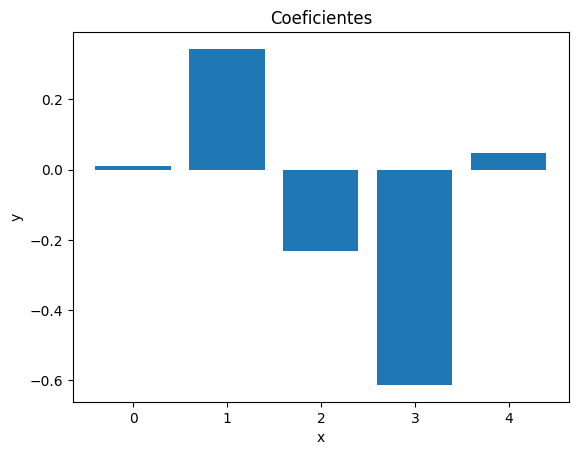

In [29]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [30]:
predictions = model.predict(X_test)

In [31]:
y_test

[1,
 1,
 1,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 2,
 1,
 0,
 2,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 1,
 1,
 0,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 2,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 2,
 2,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,


In [32]:
print(confusion_matrix( predictions,y_test))

[[  0   0   0]
 [ 65 310 168]
 [  7 100 150]]


In [33]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average='weighted',zero_division=0),2))
print("recall",round(recall_score(y_test,predictions,average='weighted',zero_division=0),2))
print("f1_score: ",round(f1_score(y_test,predictions,average='weighted',zero_division=0),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.57
precision:  0.52
recall 0.57
f1_score:  0.54
matthews_score:  0.2


In [34]:
X_train.shape

(800, 5)

In [35]:
X_test.shape

(800, 5)

In [36]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [37]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [38]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.590000 (0.066082)


In [39]:
Y_train_cv

array([1, 0, 2, ..., 2, 2, 2])

In [40]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/s

Logistic Regression: 0.540000 (0.066795)


/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/s

In [41]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.590000 (0.046871)


In [42]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20,shuffle=True,random_state=987)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.550000 (0.068268)


In [43]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20,shuffle=True,random_state=987)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.230000 (0.089273)


In [44]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [45]:
#linear_model

In [46]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [47]:
print(y_test.count(0))
print(y_test.count(1))
print(y_test.count(2))

72
410
318


In [48]:
print(list(predictions).count(0))
print(list(predictions).count(1))
print(list(predictions).count(2))

0
543
257


In [49]:
confusion_matrix(y_predict,y_test)

NameError: name 'y_predict' is not defined

In [ ]:
y_predict = model.predict(X_test)
print(classification_report(y_predict, y_test,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.76      0.57      0.65       543
           2       0.47      0.58      0.52       257

    accuracy                           0.57       800
   macro avg       0.41      0.38      0.39       800
weighted avg       0.66      0.57      0.61       800



In [ ]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2,

In [ ]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [ ]:
explainer.expected_value

array([-1.04927613,  0.61619994,  0.43307619])

In [ ]:
shap_values[0]

.values =
array([[ 0.00462235, -0.03738604,  0.03276369],
       [ 0.10141673, -0.31690128,  0.21548456],
       [-0.52341634,  0.49826604,  0.0251503 ],
       [-0.1371387 ,  0.15287016, -0.01573146],
       [-0.03218053,  0.05166379, -0.01948325]])

.base_values =
array([-1.04927613,  0.61619994,  0.43307619])

.data =
array([ 0.4364396 ,  0.39683931,  2.37777938,  0.31398523, -0.47890661])

In [ ]:
#shap.plots.beeswarm(shap_values)

In [ ]:
#ind = 1
#shap.plots.force(shap_values[ind])

In [ ]:
X_test

array([[ 0.4364396 ,  0.39683931,  2.37777938,  0.31398523, -0.47890661],
       [ 0.4908682 , -0.28515948, -0.35074827, -0.39767468, -0.47890661],
       [-1.59782925, -0.97102478,  1.18851676, -0.92896736, -0.47890661],
       ...,
       [ 0.54821262, -0.29697915, -0.3986604 , -0.2971148 , -0.47890661],
       [-0.09229535, -0.30903704, -0.21832309, -0.45170396, -0.47890661],
       [-1.59782925, -0.97102478, -0.65171312, -0.92896736, -0.47890661]])

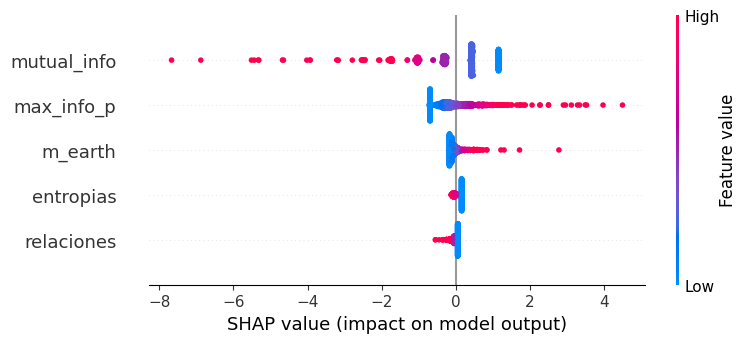

In [ ]:
shap.plots.beeswarm(shap_values[:,:,1])

TypeError: only integer scalar arrays can be converted to a scalar index

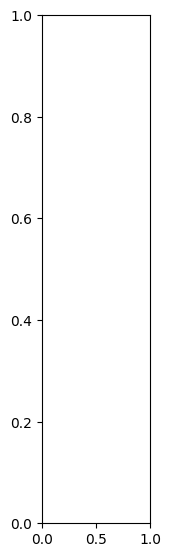

In [ ]:
shap.summary_plot(shap_values[0:,], X_test[0:,])

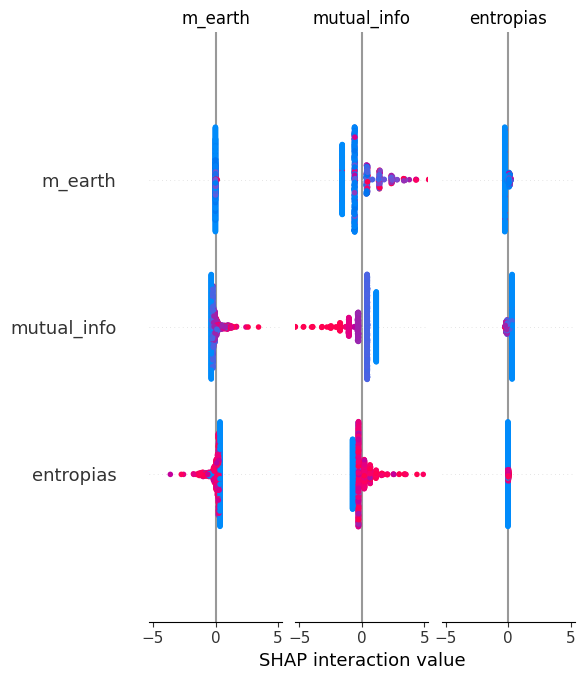

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.13986869,  1.54140439, -0.67911976,  0.05488351],
       [ 0.13986869,  1.54140439, -0.67911976,  0.05488351],
       [-0.06447546,  0.58786659, -0.30740991,  0.05488351],
       ...,
       [-0.04294812,  0.57306521, -0.25809579,  0.05488351],
       [ 0.01161541,  0.59038768, -0.36110359,  0.05488351],
       [ 0.13986869,  1.54140439, -0.67911976,  0.05488351]])

.base_values =
array([-0.09282385, -0.09282385, -0.09282385, -0.09282385, -0.09282385,
       -0.09282385, -0.09282385, -0.09282385, -0.09282385, -0.09282385,
       -0.09282385, -0.09282385, -0.09282385, -0.09282385, -0.09282385,
       -0.09282385, -0.09282385, -0.09282385, -0.09282385, -0.09282385,
       -0.09282385, -0.09282385, -0.09282385, -0.09282385, -0.09282385,
       -0.09282385, -0.09282385, -0.09282385, -0.09282385, -0.09282385,
       -0.09282385, -0.09282385, -0.09282385, -0.09282385, -0.09282385,
       -0.09282385, -0.09282385, -0.09282385, -0.09282385, -0.09282385,
       -0.09282385,

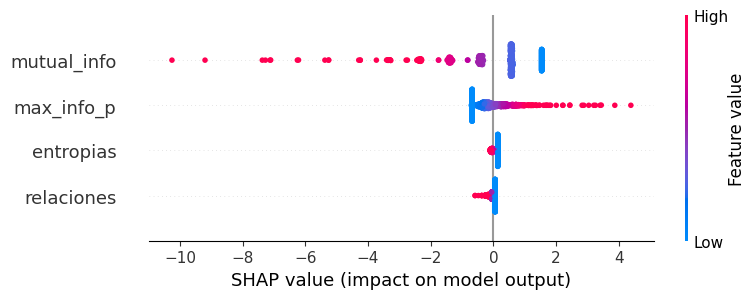

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.09282385200867488

In [ ]:
shap_values.shape

(800, 4)